# Exercise 2 : Basic Statistics

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Problem 1 : Data Preparation

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You may get information about the data types using `dtypes`.

In [3]:
houseData.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


You may also get more information about the dataset using `info()`.

In [4]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Note that there are 35 `int64` and 3 `float64` variables in the dataset.     
Extract the 38 variables by filtering the variables using their `dtypes`.

In [5]:
houseDataNum = houseData.loc[:, houseData.dtypes == np.int64]
print("Data dims : ", houseDataNum.shape) 
houseDataNum.info()   # note that all variables are now int64

Data dims :  (1460, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1

That was very Pythonic way of implementing the `dtypes` filter.    
There is a much cleaner way of doing it in Pandas, as follows.

In [6]:
houseDataNum = houseData.select_dtypes(include = np.int64)
print("Data dims : ", houseDataNum.shape) 
houseDataNum.info()   # note that all variables are now int64

Data dims :  (1460, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1

Read `data_description.txt` (from the Kaggle data folder) to identify the *actual* Numeric variables.   
Note that this table is created *manually*, and this is my interpretation. Feel free to choose your own.   
      
| Variable        | Observation                   |    
| --------------: | :---------------------------: |    
| Id              | Numeric, but simply an index  |   
| MSSubClass      | Categorial, numeric encoding  |
| LotArea         | Numeric Variable              |   
| OverallQual     | Categorial : Ordinal 1-to-10  |   
| OverallCond     | Categorial : Ordinal 1-to-10  |   
| YearBuilt       | Time Stamp, not just numeric  |   
| YearRemodAdd    | Time Stamp, not just numeric  |   
| BsmtFinSF1      | Numeric Variable              |    
| BsmtFinSF2      | Numeric Variable              |    
| BsmtUnfSF       | Numeric Variable              |    
| TotalBsmtSF     | Numeric Variable              |    
| 1stFlrSF        | Numeric Variable              |     
| 2ndFlrSF        | Numeric Variable              |    
| LowQualFinSF    | Numeric Variable              |    
| GrLivArea       | Numeric Variable              |    
| BsmtFullBath    | Numeric Variable              |    
| BsmtHalfBath    | Numeric Variable              |    
| FullBath        | Numeric Variable              |    
| HalfBath        | Numeric Variable              |    
| BedroomAbvGr    | Numeric Variable              |    
| KitchenAbvGr    | Numeric Variable              |    
| TotRmsAbvGrd    | Numeric Variable              |    
| Fireplaces      | Numeric Variable              |    
| GarageCars      | Numeric Variable              |    
| GarageArea      | Numeric Variable              |    
| WoodDeckSF      | Numeric Variable              |    
| OpenPorchSF     | Numeric Variable              |    
| EnclosedPorc    | Numeric Variable              |    
| 3SsnPorch       | Numeric Variable              |    
| ScreenPorch     | Numeric Variable              |    
| PoolArea        | Numeric Variable              |    
| MiscVal         | Numeric Variable              |    
| MoSold          | Time Stamp, not just numeric  |   
| YrSold          | Time Stamp, not just numeric  |   
| SalePrice       | Numeric Variable              |    

Drop the non-Numeric variables (axis = 1) from the DataFrame to obtain a pure Numeric DataFrame. Keeping `Id` for records.

In [7]:
houseDataNum = houseDataNum.drop(['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold'], axis = 1)

In [8]:
houseDataNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
Id               1460 non-null int64
LotArea          1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
3SsnPorch        1460 non-null int64
Scree

---

## Problem 2 : Statistical Summary

Extract just one variable, `SalePrice`, from the DataFrame.

In [9]:
saleprice = pd.DataFrame(houseDataNum['SalePrice'])
print("Data type : ", type(saleprice))
print("Data dims : ", saleprice.size)
saleprice.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  1460


,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


Summary Statistics of `saleprice`, followed by Statistical Visualizations on the variable. 

In [10]:
saleprice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


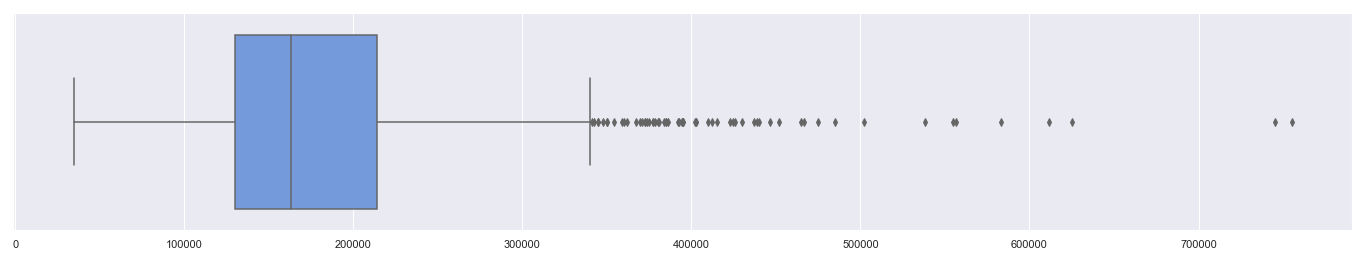

In [27]:
f, axes = plt.subplots(1, 1, figsize=(24, 4))
sb.boxplot(saleprice, orient = "h", color = "cornflowerblue")

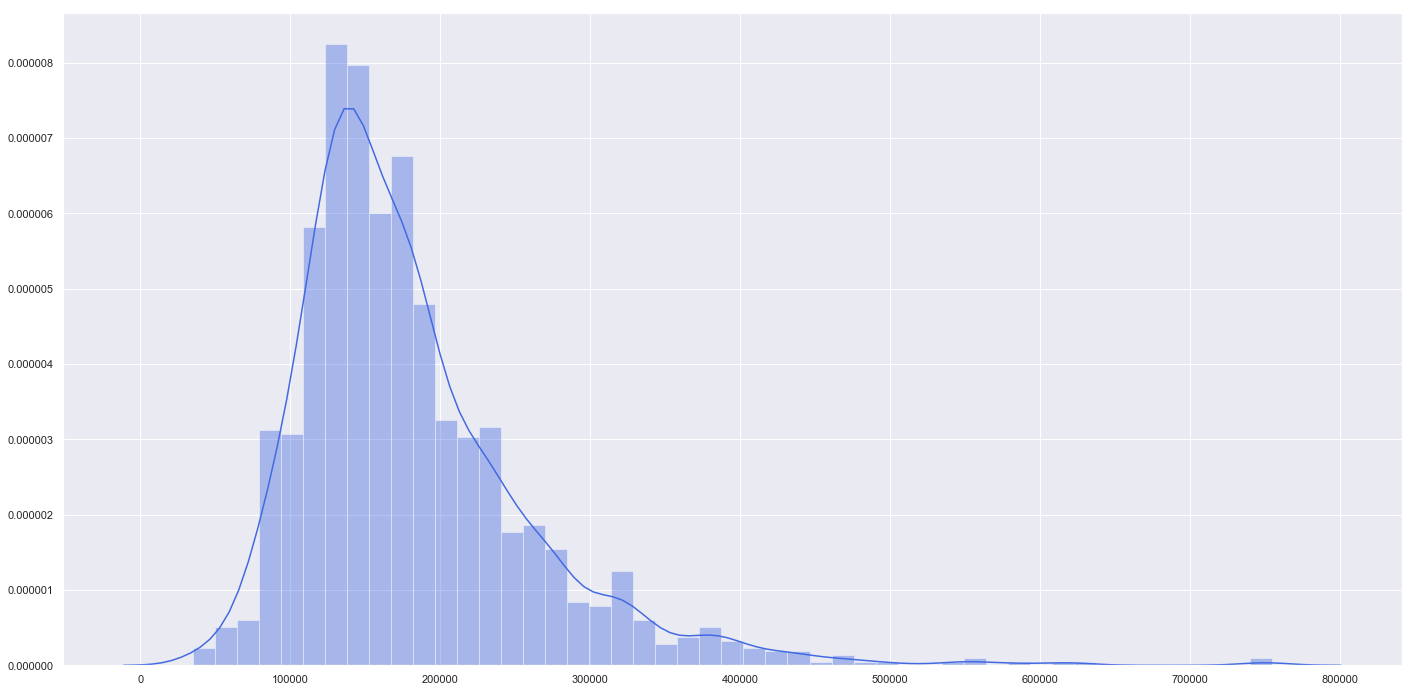

In [33]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(saleprice, color = "royalblue")

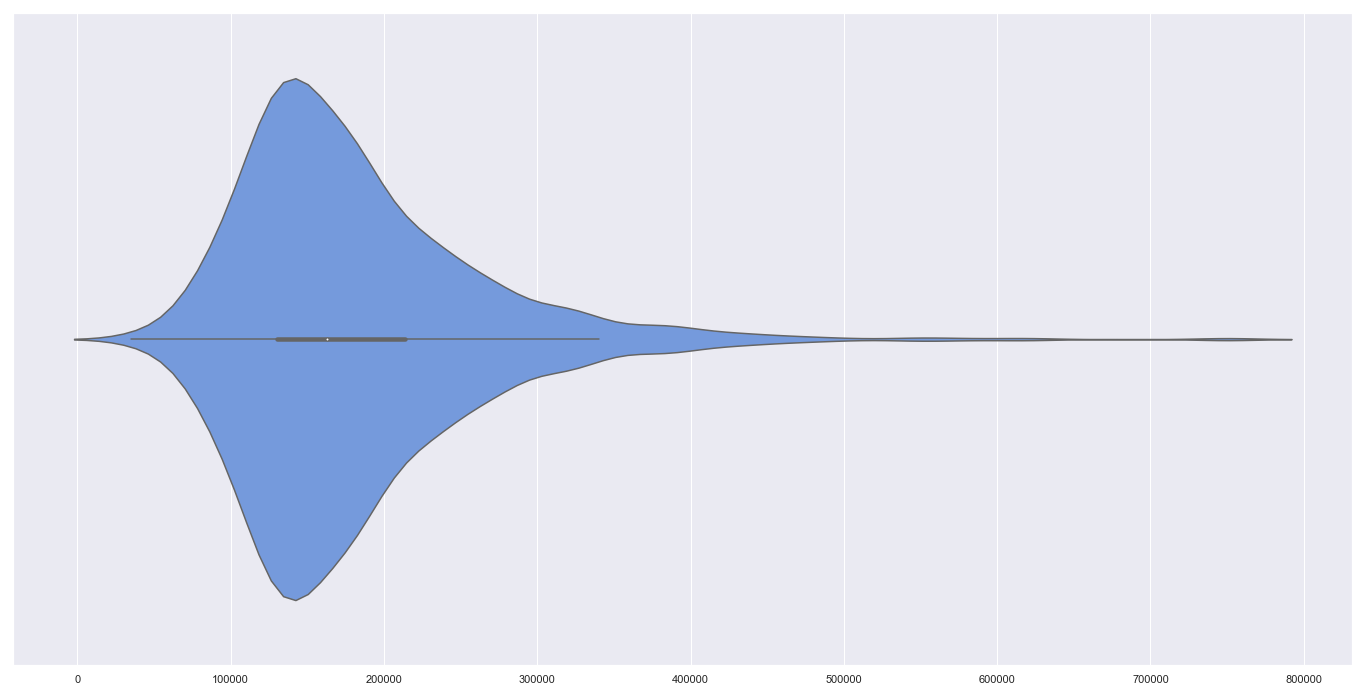

In [29]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.violinplot(saleprice, color = "cornflowerblue")

Summary Statistics of `LotArea`, followed by Statistical Visualizations on the variable. 

In [13]:
lotarea = pd.DataFrame(houseDataNum['LotArea'])
print("Data type : ", type(lotarea))
print("Data dims : ", lotarea.size)
lotarea.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  1460


,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260


In [14]:
lotarea.describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


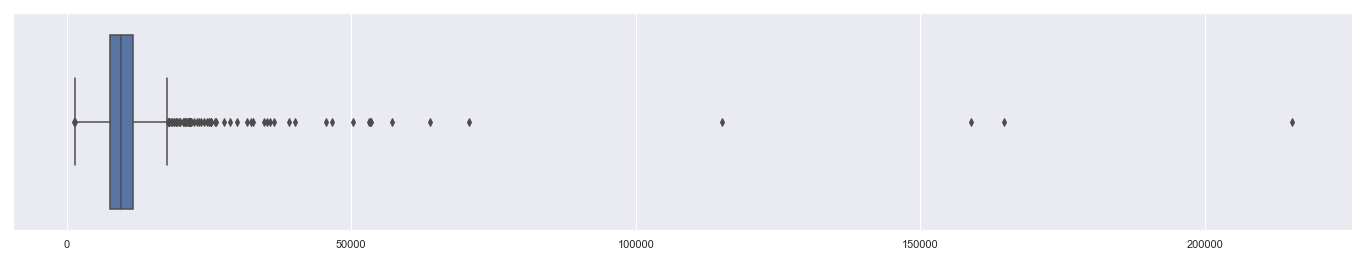

In [15]:
f, axes = plt.subplots(1, 1, figsize=(24, 4))
sb.boxplot(lotarea, orient = "h")

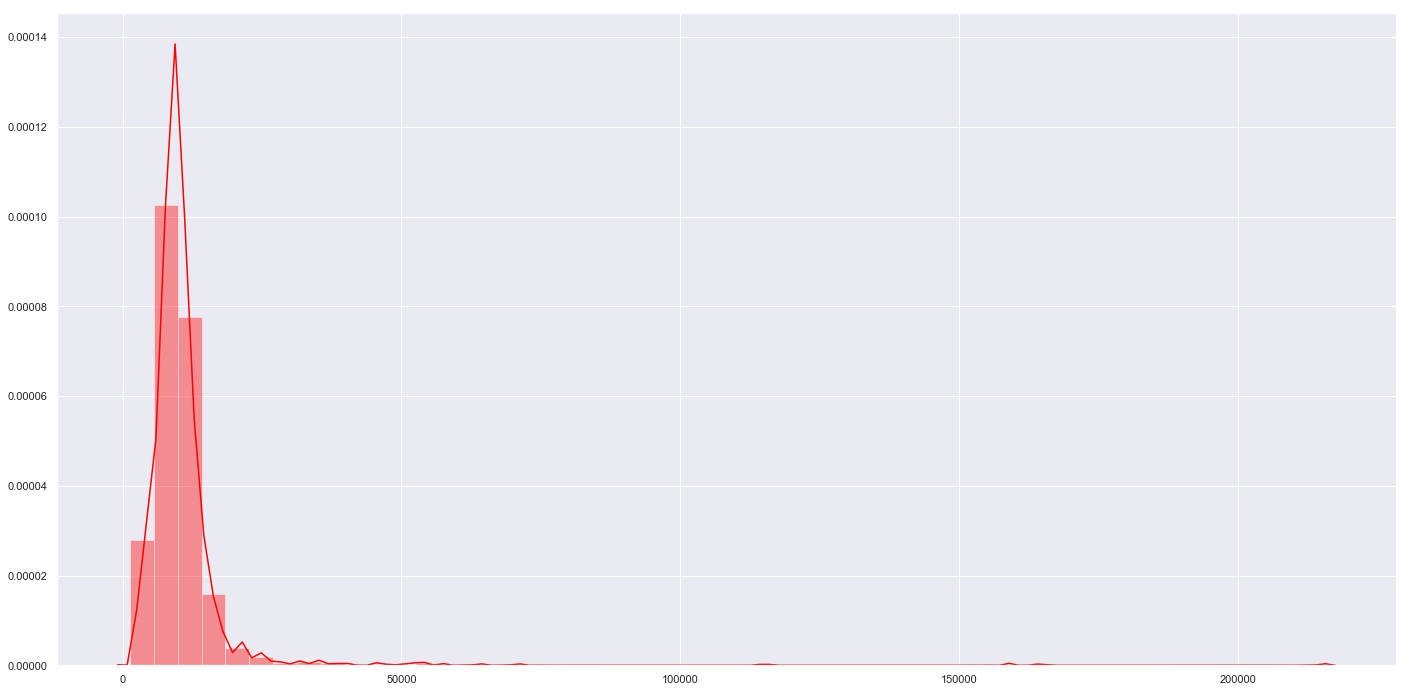

In [16]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.distplot(lotarea, color = "red")

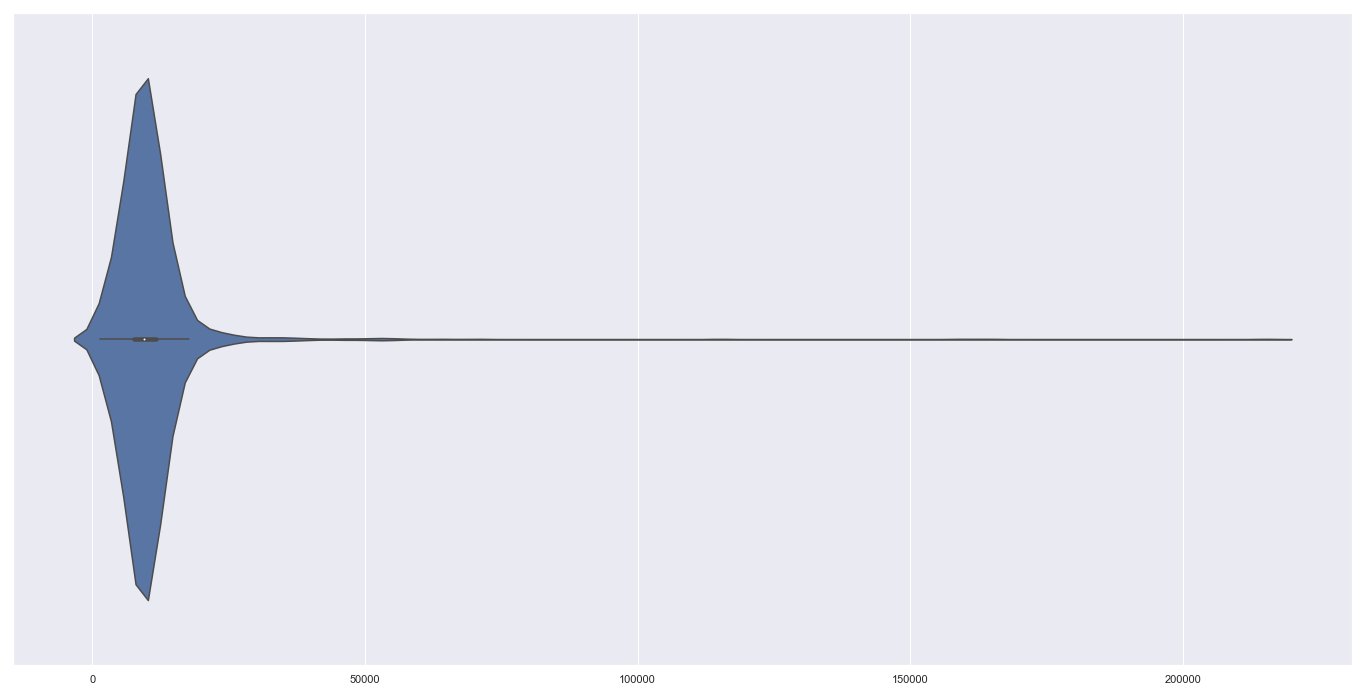

In [17]:
f, axes = plt.subplots(1, 1, figsize=(24, 12))
sb.violinplot(lotarea)

Extract two variables from the DataFrame -- `SalePrice` and `LotArea` -- and check their mutual relationship.

In [18]:
saleprice = pd.DataFrame(houseDataNum['SalePrice'])
lotarea = pd.DataFrame(houseDataNum['LotArea'])

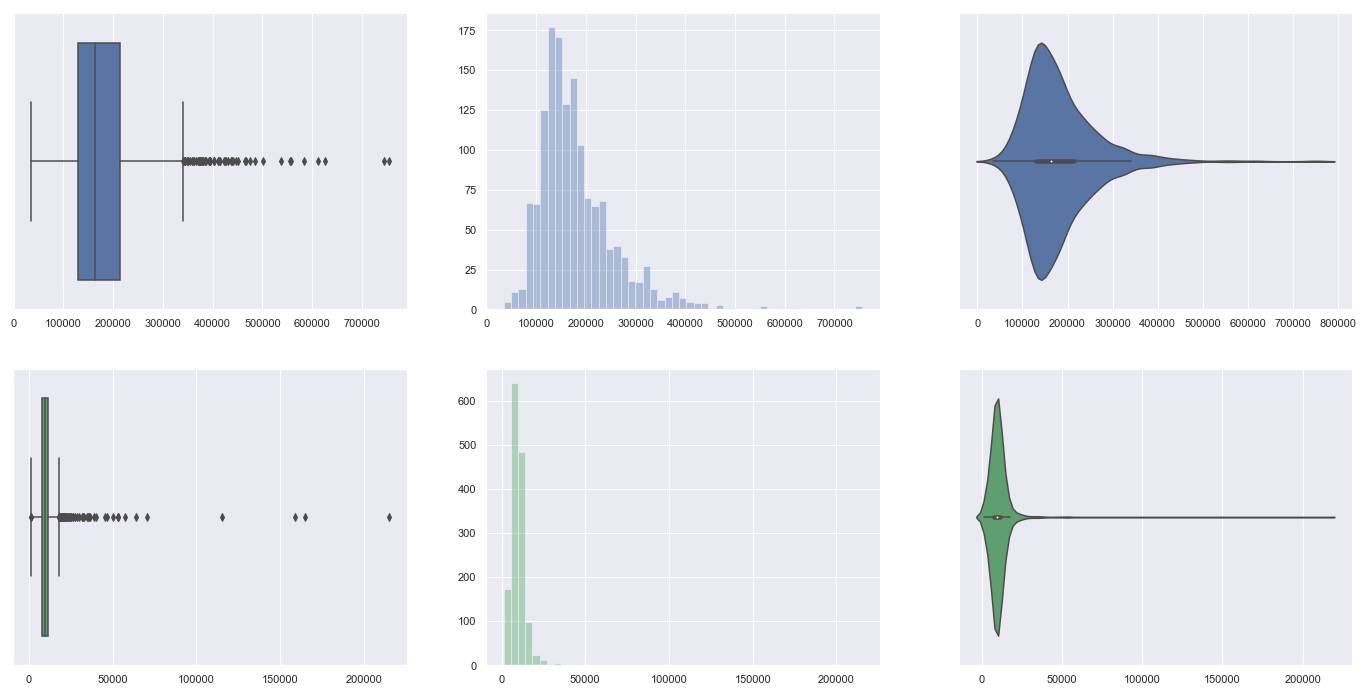

In [19]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP
sb.boxplot(saleprice, orient = "h", ax = axes[0,0])
sb.distplot(saleprice, kde = False, ax = axes[0,1])
sb.violinplot(saleprice, ax = axes[0,2])

# Plot the basic uni-variate figures for Attack
sb.boxplot(lotarea, orient = "h", ax = axes[1,0], color = 'g')
sb.distplot(lotarea, kde = False, ax = axes[1,1], color = 'g')
sb.violinplot(lotarea, ax = axes[1,2], color = 'g')

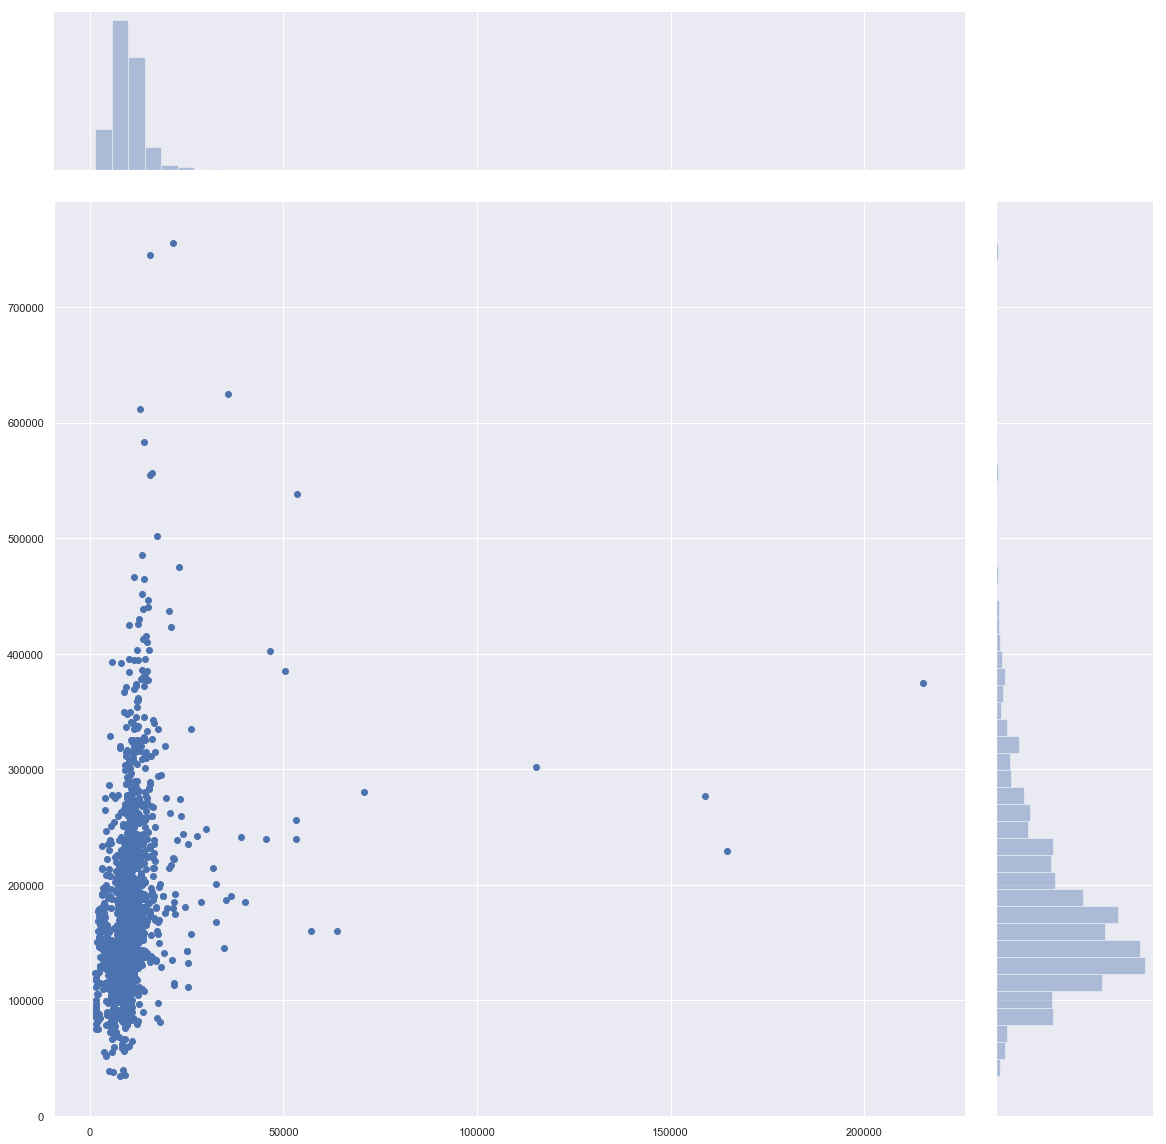

In [20]:
sb.jointplot(x = lotarea, y = saleprice, height = 16)

In [21]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([lotarea, saleprice], axis = 1, join_axes = [lotarea.index])

# Calculate the correlation between the two columns/variables
jointDF.corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


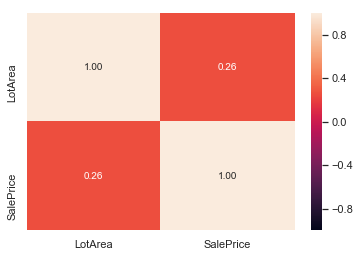

In [22]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")